In [2]:
import pandas as pd, numpy as np, os
import matplotlib.pyplot as plt
import matplotlib.backends.backend_pdf
from matplotlib.backends.backend_pdf import PdfPages

In [3]:
output_dir = '/ihme/costeffectiveness/results/vivarium_ciff_sam/v5.3.3_sam_k_sensitivity/ciff_sam/2022_02_08_09_51_56/count_data/'

In [4]:
figname = 'model_5.3.3'

In [5]:
os.listdir(output_dir)

['wasting_transition_count.hdf',
 'wasting_transition_count.csv',
 'wasting_state_person_time.hdf',
 'deaths.csv',
 'wasting_state_person_time.csv',
 'deaths.hdf',
 'disease_transition_count.csv',
 'births.csv',
 'population.csv',
 'stunting_state_person_time.hdf',
 'ylds.csv',
 'ylls.csv',
 'disease_state_person_time.csv',
 'population.hdf',
 'ylls.hdf',
 'ylds.hdf',
 'disease_state_person_time.hdf',
 'births.hdf',
 'disease_transition_count.hdf',
 'stunting_state_person_time.csv']

In [6]:
births = pd.read_csv(output_dir +'births.csv').drop(columns='Unnamed: 0')
birth_count = births.loc[births.measure=='total_births']
bw_sum = births.loc[births.measure=='birth_weight_sum']
lbw_sum = births.loc[births.measure=='low_weight_births']
birth_count.head()

,sex,year,measure,input_draw,scenario,sam_k,value,insecticide_treated_nets,maternal_supplementation,maternal_malnutrition
3072,female,2022,total_births,29,baseline,alternative,0.0,covered,bep,cat2
3073,female,2022,total_births,29,baseline,alternative,0.0,uncovered,bep,cat2
3074,female,2022,total_births,29,baseline,alternative,0.0,covered,mmn,cat2
3075,female,2022,total_births,29,baseline,alternative,0.0,uncovered,mmn,cat2
3076,female,2022,total_births,29,baseline,alternative,1299.0,covered,ifa,cat2


In [9]:
((bw_sum.groupby(['sam_k','input_draw','scenario','sex']).sum()/birth_count.groupby(['sam_k','input_draw','scenario','sex']).sum())
 .groupby(['sam_k','scenario','sex']).describe())[['value']]

value                          \
                                       count         mean        std   
sam_k       scenario            sex                                    
alternative baseline            female  12.0  3278.759048  39.041922   
                                male    12.0  3128.979855  24.371252   
            lbwsg_interventions female  12.0  3316.117532  40.500670   
                                male    12.0  3167.037232  25.262260   
            sqlns               female  12.0  3278.231594  39.190236   
                                male    12.0  3129.237087  24.503206   
            wasting_treatment   female  12.0  3278.772363  38.992005   
                                male    12.0  3129.059808  24.984110   
baseline    baseline            female  12.0  3278.306454  39.425961   
                                male    12.0  3129.401493  24.586009   
            lbwsg_interventions female  12.0  3315.883717  40.053622   
                                male    12.0  3166.882012  25.200996   
            sqlns               female  12.0  3278.172528  39.300902   
                                male    12.0  3129.061864  24.573597   
            wasting_treatment   female  12.0  3278.225981  39.239481   
                                male    12.0  3129.669540  24.394536   

                                                                               \
                                                min          25%          50%   
sam_k       scenario            sex                                             
alternative baseline            female  3212.150727  3241.335582  3287.503350   
                                male    3089.210861  3110.418204  3129.136388   
            lbwsg_interventions female  3242.306353  3283.603122  3318.554019   
                                male    3130.356461  3149.067131  3165.065936   
            sqlns               female  3212.150727  3240.016854  3286.906596   
                                male    3088.764327  3110.966496  3129.939533   
            wasting_treatment   female  3212.150727  3242.981843  3286.906596   
                                male    3085.506281  3110.966496  3130.093808   
baseline    baseline            female  3212.150727  3239.685524  3286.906596   
                                male    3088.764327  3110.490474  3130.053199   
            lbwsg_interventions female  3242.306353  3283.750450  3318.711143   
                                male    3131.476643  3148.479254  3164.555647   
            sqlns               female  3212.150727  3239.733718  3286.906596   
                                male    3088.764327  3110.966496  3129.837974   
            wasting_treatment   female  3212.150727  3240.201697  3285.857764   
                                male    3089.164494  3111.815037  3131.208113   

                                                                  
                                                75%          max  
sam_k       scenario            sex                               
alternative baseline            female  3297.632807  3342.371639  
                                male    3148.209911  3167.534743  
            lbwsg_interventions female  3337.644367  3378.896802  
                                male    3181.748327  3213.503263  
            sqlns               female  3297.281432  3342.964530  
                                male    3148.139104  3167.797252  
            wasting_treatment   female  3298.292357  3342.964530  
                                male    3148.209911  3167.797252  
baseline    baseline            female  3297.622679  3342.964530  
                                male    3148.209911  3167.797252  
            lbwsg_interventions female  3336.860085  3378.896802  
                                male    3181.818382  3213.203749  
            sqlns               female  3297.317867  3342.964530  
                                male    3148.209911  3167.

In [10]:
(lbw_sum.groupby(['sam_k','scenario','sex']).sum()/birth_count.groupby(['sam_k','scenario','sex']).sum())[['value']]

value
sam_k       scenario            sex             
alternative baseline            female  0.088086
                                male    0.126069
            lbwsg_interventions female  0.082482
                                male    0.117781
            sqlns               female  0.088292
                                male    0.126018
            wasting_treatment   female  0.088034
                                male    0.125884
baseline    baseline            female  0.088025
                                male    0.125892
            lbwsg_interventions female  0.082556
                                male    0.117964
            sqlns               female  0.088217
                                male    0.126115
            wasting_treatment   female  0.088116
                                male    0.126016

# Intervention coverage

## maternal supplementation coverage

In [11]:
# check coverage
 
c = birth_count.groupby(['sam_k','input_draw','scenario','year','maternal_supplementation']).sum()
ca = birth_count.groupby(['sam_k','input_draw','scenario','year']).sum()
cr = (c / ca).groupby(['sam_k','scenario','year','maternal_supplementation']).describe(percentiles=[0.025,0.975])
cr

value            \
                                                            count      mean   
sam_k       scenario          year maternal_supplementation                   
alternative baseline          2022 bep                       12.0  0.000000   
                                   ifa                       12.0  0.594950   
                                   mmn                       12.0  0.000000   
                                   uncovered                 12.0  0.405050   
                              2023 bep                       12.0  0.000000   
...                                                           ...       ...   
baseline    wasting_treatment 2025 uncovered                 12.0  0.404462   
                              2026 bep                       12.0  0.000000   
                                   ifa                       12.0  0.595038   
                                   mmn                       12.0  0.000000   
                                   uncovered                 12.0  0.404962   

                                                                       \
                                                                  std   
sam_k       scenario          year maternal_supplementation             
alternative baseline          2022 bep                       0.000000   
                                   ifa                       0.007856   
                                   mmn                       0.000000   
                                   uncovered                 0.007856   
                              2023 bep                       0.000000   
...                                                               ...   
baseline    wasting_treatment 2025 uncovered                 0.009614   
                              2026 bep                       0.000000   
                                   ifa                       0.006183   
                                   mmn                       0.000000   
                                   uncovered                 0.006183   

                                                                       \
                                                                  min   
sam_k       scenario          year maternal_supplementation             
alternative baseline          2022 bep                       0.000000   
                                   ifa                       0.582592   
                                   mmn                       0.000000   
                                   uncovered                 0.394602   
                              2023 bep                       0.000000   
...                                                               ...   
baseline    wasting_treatment 2025 uncovered                 0.393872   
                              2026 bep                       0.000000   
                                   ifa                       0.583604   
                                   mmn                       0.000000   
                                   uncovered                 0.395471   

                                                                       \
                                                                 2.5%   
sam_k       scenario          year maternal_supplementation             
alternative baseline          2022 bep                       0.000000   
                                   ifa                       0.583268   
                                   mmn                       0.000000   
                                   uncovered                 0.395361   
                              2023 bep                       0.000000   
...                                                               ...   
baseline    wasting_treatment 2025 uncovered                 0.393948   
                              2026 bep                       0.000000   
                                   ifa                       0.584316   
                               

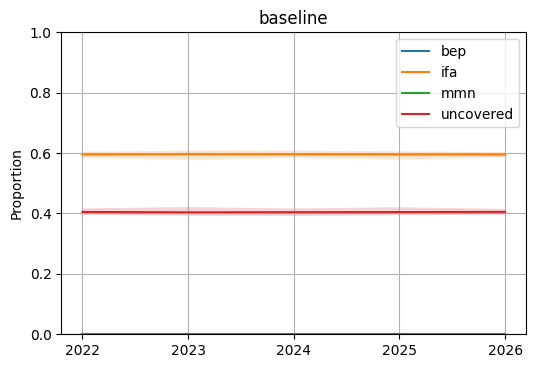

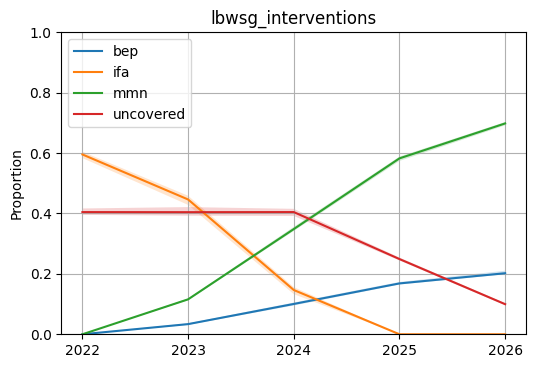

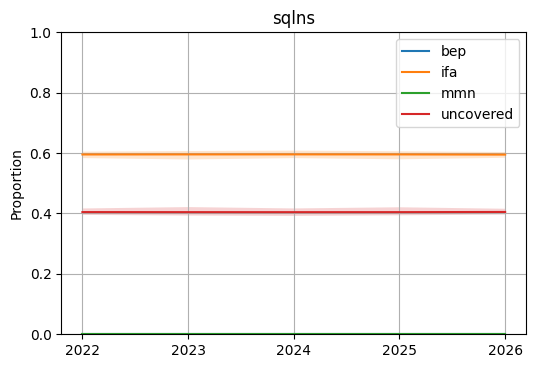

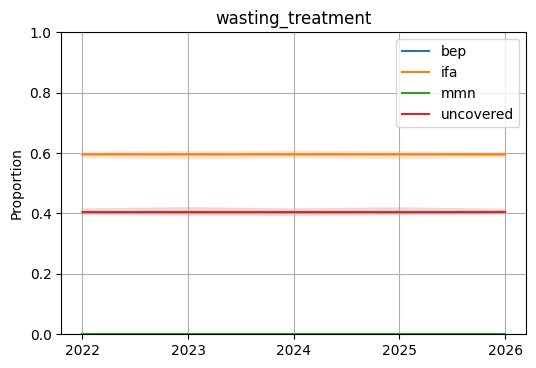

In [13]:
for scenario in cr.reset_index().scenario.unique():
    plt.figure(dpi=100)
    for regimen in cr.reset_index().maternal_supplementation.unique():
        p = cr.reset_index()
        p = p.loc[(p.scenario==scenario)&(p.sam_k=='alternative')]
        p = p.loc[p.maternal_supplementation==regimen]
        plt.plot(p.year, p['value','mean'], label=regimen)
        plt.fill_between(p.year, p['value','2.5%'], p['value','97.5%'], alpha=0.2)
    plt.legend()
    plt.ylim(0,1)
    plt.title(f'{scenario}')
    plt.ylabel('Proportion')
    plt.xticks(p.year.unique())
    plt.grid()
    
# conclusion:

    # looks as expected... baseline IFA coverage decreases before baseline uncovered
    # expected target rate
    # wiggles in lines are due to date cut off subtleties
    # should make this into a bar chart or something if we actually want to present these figures

## ITN coverage

In [14]:
# check coverage
c = birth_count.groupby(['sam_k','input_draw','scenario','year','insecticide_treated_nets']).sum()
ca = birth_count.groupby(['sam_k','input_draw','scenario','year']).sum()
cr = (c / ca).groupby(['sam_k','scenario','year','insecticide_treated_nets']).describe(percentiles=[0.025,0.975])
cr

value            \
                                                            count      mean   
sam_k       scenario          year insecticide_treated_nets                   
alternative baseline          2022 covered                   12.0  0.264627   
                                   uncovered                 12.0  0.735373   
                              2023 covered                   12.0  0.264905   
                                   uncovered                 12.0  0.735095   
                              2024 covered                   12.0  0.264067   
...                                                           ...       ...   
baseline    wasting_treatment 2024 uncovered                 12.0  0.735553   
                              2025 covered                   12.0  0.263716   
                                   uncovered                 12.0  0.736284   
                              2026 covered                   12.0  0.265686   
                                   uncovered                 12.0  0.734314   

                                                                       \
                                                                  std   
sam_k       scenario          year insecticide_treated_nets             
alternative baseline          2022 covered                   0.008906   
                                   uncovered                 0.008906   
                              2023 covered                   0.011111   
                                   uncovered                 0.011111   
                              2024 covered                   0.011872   
...                                                               ...   
baseline    wasting_treatment 2024 uncovered                 0.011939   
                              2025 covered                   0.011396   
                                   uncovered                 0.011396   
                              2026 covered                   0.013245   
                                   uncovered                 0.013245   

                                                                       \
                                                                  min   
sam_k       scenario          year insecticide_treated_nets             
alternative baseline          2022 covered                   0.246682   
                                   uncovered                 0.723561   
                              2023 covered                   0.247023   
                                   uncovered                 0.721189   
                              2024 covered                   0.239438   
...                                                               ...   
baseline    wasting_treatment 2024 uncovered                 0.719298   
                              2025 covered                   0.241685   
                                   uncovered                 0.722133   
                              2026 covered                   0.240823   
                                   uncovered                 0.716905   

                                                                       \
                                                                 2.5%   
sam_k       scenario          year insecticide_treated_nets             
alternative baseline          2022 covered                   0.248559   
                                   uncovered                 0.724215   
                              2023 covered                   0.247727   
                                   uncovered                 0.721312   
                              2024 covered                   0.242499   
...                                                               ...   
baseline    wasting_treatment 2024 uncovered                 0.719811   
                              2025 covered                   0.244217   
                                   uncovered                 0.723033   
                              2

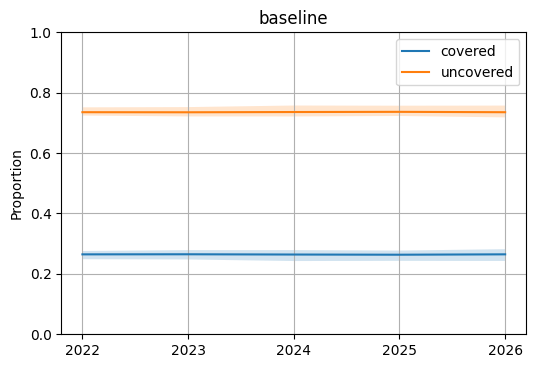

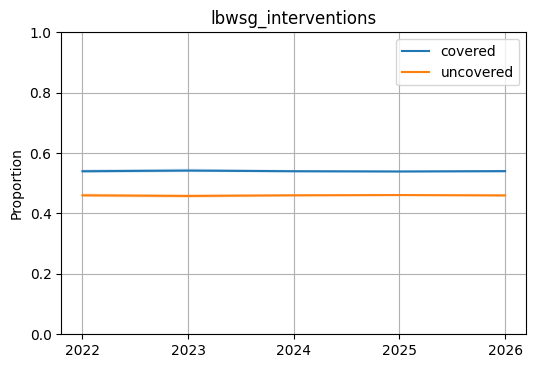

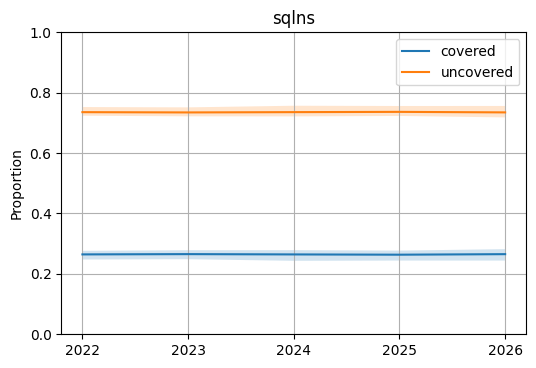

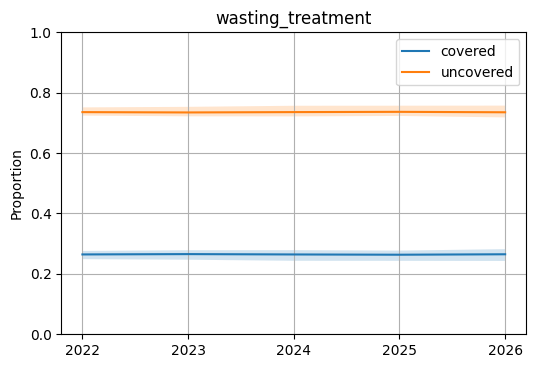

In [15]:
for scenario in cr.reset_index().scenario.unique():
    plt.figure(dpi=100)
    for regimen in cr.reset_index().insecticide_treated_nets.unique():
        p = cr.reset_index()
        p = p.loc[(p.scenario==scenario)&(p.sam_k=='alternative')]
        p = p.loc[p.insecticide_treated_nets==regimen]
        plt.plot(p.year, p['value','mean'], label=regimen)
        plt.fill_between(p.year, p['value','2.5%'], p['value','97.5%'], alpha=0.2)
    plt.legend()
    plt.ylim(0,1)
    plt.title(f'{scenario}')
    plt.ylabel('Proportion')
    plt.xticks(p.year.unique())
    plt.grid()
    
# target rates look good, but doesn't appear to go through scale-up

## Look at correlation between ITNs and maternal supplementation

In [16]:
# check coverage
 
c = birth_count.groupby(['sam_k','input_draw','scenario','insecticide_treated_nets','maternal_supplementation']).sum()
ca = birth_count.groupby(['sam_k','input_draw','scenario','insecticide_treated_nets']).sum()
cr = ((c / ca).groupby(['sam_k','scenario','maternal_supplementation','insecticide_treated_nets'])
      .describe(percentiles=[0.025,0.975])
      .reset_index()
     .drop(columns='year'))
cr.loc[cr.scenario.isin(['baseline','lbwsg_interventions'])]

# looks as expected!

/ihme/code/alibow/miniconda/envs/ciff_sam_38/lib/python3.8/site-packages/pandas/core/generic.py:4150: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  obj = obj._drop_axis(labels, axis, level=level, errors=errors)


sam_k             scenario maternal_supplementation  \
                                                                
0   alternative             baseline                      bep   
1   alternative             baseline                      bep   
2   alternative             baseline                      ifa   
3   alternative             baseline                      ifa   
4   alternative             baseline                      mmn   
5   alternative             baseline                      mmn   
6   alternative             baseline                uncovered   
7   alternative             baseline                uncovered   
8   alternative  lbwsg_interventions                      bep   
9   alternative  lbwsg_interventions                      bep   
10  alternative  lbwsg_interventions                      ifa   
11  alternative  lbwsg_interventions                      ifa   
12  alternative  lbwsg_interventions                      mmn   
13  alternative  lbwsg_interventions                      mmn   
14  alternative  lbwsg_interventions                uncovered   
15  alternative  lbwsg_interventions                uncovered   
32     baseline             baseline                      bep   
33     baseline             baseline                      bep   
34     baseline             baseline                      ifa   
35     baseline             baseline                      ifa   
36     baseline             baseline                      mmn   
37     baseline             baseline                      mmn   
38     baseline             baseline                uncovered   
39     baseline             baseline                uncovered   
40     baseline  lbwsg_interventions                      bep   
41     baseline  lbwsg_interventions                      bep   
42     baseline  lbwsg_interventions                      ifa   
43     baseline  lbwsg_interventions                      ifa   
44     baseline  lbwsg_interventions                      mmn   
45     baseline  lbwsg_interventions                      mmn   
46     baseline  lbwsg_interventions                uncovered   
47     baseline  lbwsg_interventions                uncovered   

   insecticide_treated_nets value                                          \
                            count      mean       std       min      2.5%   
0                   covered  12.0  0.000000  0.000000  0.000000  0.000000   
1                 uncovered  12.0  0.000000  0.000000  0.000000  0.000000   
2                   covered  12.0  0.596222  0.007427  0.583403  0.583932   
3                 uncovered  12.0  0.595074  0.007909  0.580554  0.581574   
4                   covered  12.0  0.000000  0.000000  0.000000  0.000000   
5                 uncovered  12.0  0.000000  0.000000  0.000000  0.000000   
6                   covered  12.0  0.403778  0.007427  0.391556  0.392874   
7                 uncovered  12.0  0.404926  0.007909  0.394922  0.395331   
8                   covered  12.0  0.100769  0.002098  0.097266  0.097388   
9                 uncovered  12.0  0.100816  0.002501  0.096265  0.096877   
10                  covered  12.0  0.238101  0.004904  0.229856  0.230442   
11                uncovered  12.0  0.237827  0.004999  0.228687  0.229187   
12                  covered  12.0  0.348527  0.002347  0.344503  0.344759   
13                uncovered  12.0  0.348514  0.002615  0.343241  0.343894   
14                  covered  12.0  0.312602  0.004661  0.306011  0.306286   
15                uncovered  12.0  0.312842  0.005056  0.305565  0.306223   
32                  covered  12.0  0.000000  0.000000  0.000000  0.000000   
33                uncovered  12.0  0.000000  0.000000  0.000000  0.000000   
34                  covered  12.0  0.596127  0.007258  0.583403  0.584125   
35                uncovered  12.0  0.595160  0.007854  0.580554  0.581506   
36                  covered  12.0  0.000000  0.000000  0.000000  0.000000   
37                uncovered 

In [17]:
# now check the reverse
 
c = birth_count.groupby(['sam_k','input_draw','scenario','maternal_supplementation','insecticide_treated_nets']).sum()
ca = birth_count.groupby(['sam_k','input_draw','scenario','maternal_supplementation']).sum()
cr = ((c / ca).groupby(['sam_k','scenario','insecticide_treated_nets','maternal_supplementation'])
      .describe(percentiles=[0.025,0.975])
      .reset_index()
     .drop(columns='year'))
cr.loc[cr.scenario.isin(['baseline','lbwsg_interventions'])].dropna()

# looks as expected

/ihme/code/alibow/miniconda/envs/ciff_sam_38/lib/python3.8/site-packages/pandas/core/generic.py:4150: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  obj = obj._drop_axis(labels, axis, level=level, errors=errors)


sam_k             scenario insecticide_treated_nets  \
                                                                
1   alternative             baseline                  covered   
3   alternative             baseline                  covered   
5   alternative             baseline                uncovered   
7   alternative             baseline                uncovered   
8   alternative  lbwsg_interventions                  covered   
9   alternative  lbwsg_interventions                  covered   
10  alternative  lbwsg_interventions                  covered   
11  alternative  lbwsg_interventions                  covered   
12  alternative  lbwsg_interventions                uncovered   
13  alternative  lbwsg_interventions                uncovered   
14  alternative  lbwsg_interventions                uncovered   
15  alternative  lbwsg_interventions                uncovered   
33     baseline             baseline                  covered   
35     baseline             baseline                  covered   
37     baseline             baseline                uncovered   
39     baseline             baseline                uncovered   
40     baseline  lbwsg_interventions                  covered   
41     baseline  lbwsg_interventions                  covered   
42     baseline  lbwsg_interventions                  covered   
43     baseline  lbwsg_interventions                  covered   
44     baseline  lbwsg_interventions                uncovered   
45     baseline  lbwsg_interventions                uncovered   
46     baseline  lbwsg_interventions                uncovered   
47     baseline  lbwsg_interventions                uncovered   

   maternal_supplementation value                                          \
                            count      mean       std       min      2.5%   
1                       ifa  12.0  0.264723  0.010908  0.243984  0.245856   
3                 uncovered  12.0  0.263809  0.011332  0.241574  0.244261   
5                       ifa  12.0  0.735277  0.010908  0.721295  0.722329   
7                 uncovered  12.0  0.736191  0.011332  0.720789  0.722164   
8                       bep  12.0  0.540103  0.006781  0.531197  0.532116   
9                       ifa  12.0  0.540492  0.003053  0.535162  0.535816   
10                      mmn  12.0  0.540215  0.002550  0.536693  0.536999   
11                uncovered  12.0  0.540018  0.002421  0.536673  0.536859   
12                      bep  12.0  0.459897  0.006781  0.443846  0.446294   
13                      ifa  12.0  0.459508  0.003053  0.453662  0.454537   
14                      mmn  12.0  0.459785  0.002550  0.455656  0.455733   
15                uncovered  12.0  0.459982  0.002421  0.455083  0.455600   
33                      ifa  12.0  0.264927  0.010975  0.244301  0.246389   
35                uncovered  12.0  0.264157  0.011256  0.241541  0.244440   
37                      ifa  12.0  0.735073  0.010975  0.720813  0.721667   
39                uncovered  12.0  0.735843  0.011256  0.721557  0.722474   
40                      bep  12.0  0.540812  0.006648  0.529522  0.531060   
41                      ifa  12.0  0.540702  0.003496  0.535162  0.535798   
42                      mmn  12.0  0.540220  0.002432  0.536657  0.536973   
43                uncovered  12.0  0.540069  0.002393  0.536673  0.536685   
44                      bep  12.0  0.459188  0.006648  0.445904  0.447727   
45                      ifa  12.0  0.459298  0.003496  0.453583  0.453605   
46                      mmn  12.0  0.459780  0.002432  0.456521  0.456587   
47                uncovered  12.0  0.459931  0.002393  0.456909  0.456924   

                                  
         50%     97.5%       max  
1   0.266799  0.277671  0.278705  
3   0.265490  0.277836  0.279211  
5   0.733201  0.754144  0.756016  
7   0.734510  0.755739  0.758426  
8   0.538480  0.553706  0.556154  
9   0.540535  0.545463  0.546338  
10  0.539491  0.544267  0.544344  
1

## Check that BEP/MMS coverage are logical by maternal malnutrition status

In [18]:
c = birth_count.groupby(['sam_k','input_draw','scenario','year','maternal_malnutrition','maternal_supplementation']).sum()
ca = birth_count.groupby(['sam_k','input_draw','scenario','year','maternal_malnutrition']).sum()
cr = (c / ca).reset_index()
assert np.all(cr.loc[(cr.maternal_malnutrition=='cat1')&(cr.maternal_supplementation=='mmn')]['value']==0), 'Malnourished mothers getting MMN'
assert np.all(cr.loc[(cr.maternal_malnutrition=='cat2')&(cr.maternal_supplementation=='bep')]['value']==0), 'Non-malnourished mothers getting BEP'

# Check maternal regimen effects

In [19]:
cols = ['sam_k','input_draw','scenario','year','maternal_malnutrition','maternal_supplementation']
b = bw_sum.groupby(cols).sum()#.drop(columns='year')
bc = birth_count.groupby(cols).sum()#.drop(columns='year')
bw = (b/bc).groupby([c for c in cols if c != 'input_draw']).describe(percentiles=[0.025,0.975])
bw.dropna().head(10)

value  \
                                                                         count   
sam_k       scenario year maternal_malnutrition maternal_supplementation         
alternative baseline 2022 cat1                  ifa                       12.0   
                                                uncovered                 12.0   
                          cat2                  ifa                       12.0   
                                                uncovered                 12.0   
                     2023 cat1                  ifa                       12.0   
                                                uncovered                 12.0   
                          cat2                  ifa                       12.0   
                                                uncovered                 12.0   
                     2024 cat1                  ifa                       12.0   
                                                uncovered                 12.0   

                                                                                       \
                                                                                 mean   
sam_k       scenario year maternal_malnutrition maternal_supplementation                
alternative baseline 2022 cat1                  ifa                       3120.859017   
                                                uncovered                 3062.288358   
                          cat2                  ifa                       3257.729759   
                                                uncovered                 3196.073670   
                     2023 cat1                  ifa                       3116.033070   
                                                uncovered                 3067.562333   
                          cat2                  ifa                       3255.372053   
                                                uncovered                 3198.776572   
                     2024 cat1                  ifa                       3122.317568   
                                                uncovered                 3067.451159   

                                                                                     \
                                                                                std   
sam_k       scenario year maternal_malnutrition maternal_supplementation              
alternative baseline 2022 cat1                  ifa                       33.484930   
                                                uncovered                 37.245932   
                          cat2                  ifa                       25.851727   
                                                uncovered                 25.324952   
                     2023 cat1                  ifa                       35.359888   
                                                uncovered                 35.995984   
                          cat2                  ifa                       27.194649   
                                                uncovered                 28.977128   
                     2024 cat1                  ifa                       35.027623   
                                                uncovered                 35.685720   

                                                                                       \
                                                                                  min   
sam_k       scenario year maternal_malnutrition maternal_supplementation                
alternative baseline 2022 cat1                  ifa                       3067.990089   
                                                uncovered                 3002.840116   
                          cat2                  ifa                       3213.006701   
                                                uncovered                 3166.568869   
                     2023 cat1                  ifa                       3042.279437   
    

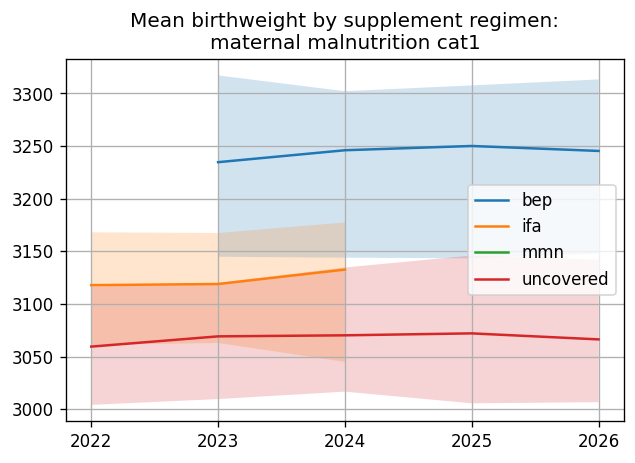

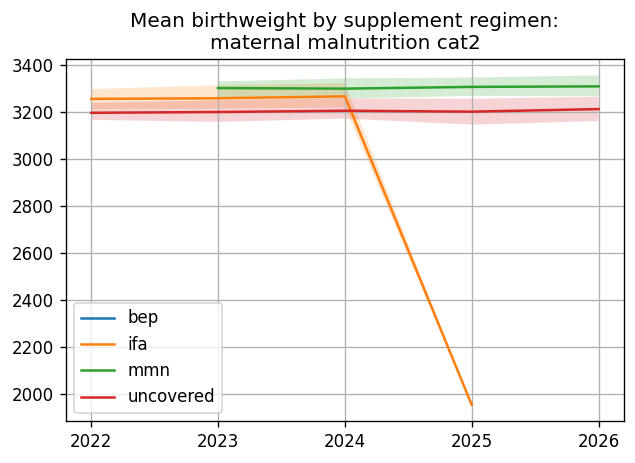

In [20]:
p = bw.reset_index()
p = p.loc[p.scenario=='lbwsg_interventions']
for cat in p.maternal_malnutrition.unique():
    plt.figure(dpi=120)
    for regimen in p.maternal_supplementation.unique():
        pp = p.loc[(p.maternal_malnutrition==cat)&(p.maternal_supplementation==regimen)
                  &(p.sam_k=='alternative')]
        plt.plot(pp.year, pp['value','mean'], label=regimen)
        plt.fill_between(pp.year, pp['value','2.5%'], pp['value','97.5%'],alpha=.20)
    plt.title(f'Mean birthweight by supplement regimen:\nmaternal malnutrition {cat}')
    plt.legend()
    plt.grid()
    plt.xticks(pp.year.unique())

In [26]:
# obervation in 2025 for ifa looks weird... investigate
birth_count.loc[(birth_count.scenario=='lbwsg_interventions')
               &(birth_count.sam_k=='alternative')
               &(birth_count.year==2025)
               &(birth_count.maternal_malnutrition=='cat2')
               &(birth_count.maternal_supplementation=='ifa')
               &(birth_count['value']!=0)]
               

# just one birth occurs in this strata... 
# don't need to worry about it

,sex,year,measure,input_draw,scenario,sam_k,value,insecticide_treated_nets,maternal_supplementation,maternal_malnutrition
17188,female,2025,total_births,232,lbwsg_interventions,alternative,1.0,covered,ifa,cat2


In [27]:
cols = ['sam_k','input_draw','scenario','maternal_malnutrition','maternal_supplementation']
b = bw_sum.groupby(cols).sum().drop(columns='year')
bc = birth_count.groupby(cols).sum().drop(columns='year')
bw = (b/bc).reset_index()
ifa = bw.loc[bw.maternal_supplementation=='ifa'].drop(columns='maternal_supplementation')
mmn = bw.loc[bw.maternal_supplementation=='mmn'].drop(columns='maternal_supplementation')
bep = bw.loc[bw.maternal_supplementation=='bep'].drop(columns='maternal_supplementation')
uncovered = bw.loc[bw.maternal_supplementation=='uncovered'].drop(columns='maternal_supplementation')

ifa_shift = ((ifa.set_index([c for c in ifa.columns if c != 'value']) 
             - uncovered.set_index([c for c in ifa.columns if c != 'value']))
              .groupby(['sam_k','scenario','maternal_malnutrition']).describe(percentiles=[0.025,0.975]))
ifa_shift

# always positive
# target: +57.73 g (7.66 to 107.79)
# looks reasonable

value             \
                                                      count       mean   
sam_k       scenario            maternal_malnutrition                    
alternative baseline            cat1                   12.0  52.877424   
                                cat2                   12.0  55.916007   
            lbwsg_interventions cat1                   12.0  52.860780   
                                cat2                   12.0  56.671227   
            sqlns               cat1                   12.0  52.677670   
                                cat2                   12.0  56.522154   
            wasting_treatment   cat1                   12.0  54.341593   
                                cat2                   12.0  55.820303   
baseline    baseline            cat1                   12.0  54.025571   
                                cat2                   12.0  55.423803   
            lbwsg_interventions cat1                   12.0  51.341887   
                                cat2                   12.0  56.724805   
            sqlns               cat1                   12.0  52.832528   
                                cat2                   12.0  56.239983   
            wasting_treatment   cat1                   12.0  53.424560   
                                cat2                   12.0  55.980166   

                                                                             \
                                                             std        min   
sam_k       scenario            maternal_malnutrition                         
alternative baseline            cat1                   30.836024   6.567480   
                                cat2                   25.348998   9.814631   
            lbwsg_interventions cat1                   34.878113  16.307723   
                                cat2                   27.085162  14.466375   
            sqlns               cat1                   29.319856  12.023069   
                                cat2                   25.214778  11.440874   
            wasting_treatment   cat1                   28.532990   9.853087   
                                cat2                   25.575795  11.440874   
baseline    baseline            cat1                   30.215469   9.853087   
                                cat2                   24.936168  11.272593   
            lbwsg_interventions cat1                   34.682741   6.624927   
                                cat2                   27.262438  14.466375   
            sqlns               cat1                   29.890750   9.853087   
                                cat2                   25.784020  11.440874   
            wasting_treatment   cat1                   29.620515   9.853087   
                                cat2                   26.179114   8.512381   

                                                                             \
                                                            2.5%        50%   
sam_k       scenario            maternal_malnutrition                         
alternative baseline            cat1                    9.941390  50.236761   
                                cat2                   14.416676  56.390764   
            lbwsg_interventions cat1                   16.842198  36.727065   
                                cat2                   16.700333  55.216278   
            sqlns               cat1                   14.235438  49.691714   
                                cat2                   16.647509  56.086624   
            wasting_treatment   cat1                   14.476009  50.236761   
                                cat2                   15.547110  56.390764   
baseline    baseline            cat1                   12.662201  50.236761   
                                cat2                   15.425106  56.390764   
            lbwsg_interventions cat1                   10.014996  34.844369   
                                cat2   

In [28]:
# but why was lbwsg/cat1 lower than all the rest??
# let's check the same thing stratified by year this time

cols = ['sam_k','input_draw','scenario','maternal_malnutrition','year','maternal_supplementation']
b = bw_sum.groupby(cols).sum()
bc = birth_count.groupby(cols).sum()
bw = (b/bc).reset_index()
ifa = bw.loc[bw.maternal_supplementation=='ifa'].drop(columns='maternal_supplementation')
mmn = bw.loc[bw.maternal_supplementation=='mmn'].drop(columns='maternal_supplementation')
bep = bw.loc[bw.maternal_supplementation=='bep'].drop(columns='maternal_supplementation')
uncovered = bw.loc[bw.maternal_supplementation=='uncovered'].drop(columns='maternal_supplementation')

ifa_shift = ((ifa.set_index([c for c in ifa.columns if c != 'value']) 
             - uncovered.set_index([c for c in ifa.columns if c != 'value']))
              .groupby(['sam_k','scenario','year','maternal_malnutrition']).describe(percentiles=[0.025,0.975]))
ifa_shift

# there's a lot of variation by year!
# lower value for lbwsg/cat1 in previous dataframe can be explained by stochastic variation because it is a small strata

value             \
                                                         count       mean   
sam_k       scenario          year maternal_malnutrition                    
alternative baseline          2022 cat1                   12.0  58.570659   
                                   cat2                   12.0  61.656089   
                              2023 cat1                   12.0  48.470737   
                                   cat2                   12.0  56.595482   
                              2024 cat1                   12.0  54.866409   
...                                                        ...        ...   
baseline    wasting_treatment 2024 cat2                   12.0  52.261889   
                              2025 cat1                   12.0  52.078462   
                                   cat2                   12.0  55.094101   
                              2026 cat1                   12.0  51.962349   
                                   cat2                   12.0  56.321192   

                                                                     \
                                                                std   
sam_k       scenario          year maternal_malnutrition              
alternative baseline          2022 cat1                   41.164200   
                                   cat2                   25.744369   
                              2023 cat1                   38.151941   
                                   cat2                   27.941767   
                              2024 cat1                   30.119120   
...                                                             ...   
baseline    wasting_treatment 2024 cat2                   26.488968   
                              2025 cat1                   38.624810   
                                   cat2                   26.526775   
                              2026 cat1                   26.726332   
                                   cat2                   30.069926   

                                                                     \
                                                                min   
sam_k       scenario          year maternal_malnutrition              
alternative baseline          2022 cat1                    3.836975   
                                   cat2                    8.320715   
                              2023 cat1                  -18.527903   
                                   cat2                   10.245160   
                              2024 cat1                    8.453217   
...                                                             ...   
baseline    wasting_treatment 2024 cat2                    6.330815   
                              2025 cat1                  -22.320401   
                                   cat2                   15.352511   
                              2026 cat1                    4.391521   
                                   cat2                    2.509543   

                                                                     \
                                                               2.5%   
sam_k       scenario          year maternal_malnutrition              
alternative baseline          2022 cat1                    9.338425   
                                   cat2                   15.466279   
                              2023 cat1                   -8.742422   
                                   cat2                   13.931023   
                              2024 cat1                   10.665668   
...                                                             ...   
baseline    wasting_treatment 2024 cat2                    9.279163   
                              2025 cat1                   -9.390071   
                                   cat2                   17.815293   
                              2026 cat1                    7.329262   
                                   cat2                    6.0345

In [30]:
mmn_shift = ((mmn.set_index([c for c in ifa.columns if c != 'value']) 
             - ifa.set_index([c for c in ifa.columns if c != 'value']))
              .groupby(['sam_k','scenario','maternal_malnutrition']).describe(percentiles=[0.025,0.975]))


# always positive
# target: +45.16 (32.31 to 58.02)
# looks high...
mmn_shift.dropna()

value             \
                                                      count       mean   
sam_k       scenario            maternal_malnutrition                    
alternative lbwsg_interventions cat2                   25.0  90.176710   
baseline    lbwsg_interventions cat2                   25.0  89.288925   

                                                                             \
                                                              std       min   
sam_k       scenario            maternal_malnutrition                         
alternative lbwsg_interventions cat2                   261.168735  2.205623   
baseline    lbwsg_interventions cat2                   261.359255  2.205623   

                                                                            \
                                                           2.5%        50%   
sam_k       scenario            maternal_malnutrition                        
alternative lbwsg_interventions cat2                   6.100892  41.029540   
baseline    lbwsg_interventions cat2                   2.505378  40.978802   

                                                                                
                                                            97.5%          max  
sam_k       scenario            maternal_malnutrition                           
alternative lbwsg_interventions cat2                   577.028556  1340.255369  
baseline    lbwsg_interventions cat2                   575.631665  1340.255369

In [32]:
bep_shift = ((bep.set_index([c for c in ifa.columns if c != 'value']) 
             - ifa.set_index([c for c in ifa.columns if c != 'value']))
              .groupby(['sam_k','scenario','maternal_malnutrition']).describe(percentiles=[0.025,0.975]))

bep_shift.dropna()
# always positive
# target: +45.16 (32.31 to 58.02) +66.96g (13.13 to 120.78) =~ 111
# looks reasonable

value              \
                                                      count        mean   
sam_k       scenario            maternal_malnutrition                     
alternative lbwsg_interventions cat1                   24.0  114.550314   
baseline    lbwsg_interventions cat1                   24.0  116.695659   

                                                                             \
                                                             std        min   
sam_k       scenario            maternal_malnutrition                         
alternative lbwsg_interventions cat1                   39.519830  25.013056   
baseline    lbwsg_interventions cat1                   42.405834  25.013056   

                                                                              \
                                                            2.5%         50%   
sam_k       scenario            maternal_malnutrition                          
alternative lbwsg_interventions cat1                   37.967944  120.048079   
baseline    lbwsg_interventions cat1                   37.967944  118.242882   

                                                                               
                                                            97.5%         max  
sam_k       scenario            maternal_malnutrition                          
alternative lbwsg_interventions cat1                   175.849234  190.497137  
baseline    lbwsg_interventions cat1                   182.483029  199.761751

## check ITN effect size

In [33]:
cols = ['sam_k','input_draw','scenario','year','insecticide_treated_nets']
b = bw_sum.groupby(cols).sum()#.drop(columns='year')
bc = birth_count.groupby(cols).sum()#.drop(columns='year')
bw = (b/bc).groupby([c for c in cols if c != 'input_draw']).describe(percentiles=[0.025,0.975])
bw.dropna().head(10)

value               \
                                                   count         mean   
sam_k       scenario year insecticide_treated_nets                      
alternative baseline 2022 covered                   12.0  3228.539721   
                          uncovered                 12.0  3193.301461   
                     2023 covered                   12.0  3230.515422   
                          uncovered                 12.0  3191.875296   
                     2024 covered                   12.0  3235.684718   
                          uncovered                 12.0  3191.207701   
                     2025 covered                   12.0  3226.646933   
                          uncovered                 12.0  3191.642595   
                     2026 covered                   12.0  3228.256566   
                          uncovered                 12.0  3191.493585   

                                                                            \
                                                          std          min   
sam_k       scenario year insecticide_treated_nets                           
alternative baseline 2022 covered                   30.759848  3186.818015   
                          uncovered                 24.058087  3144.375887   
                     2023 covered                   32.385354  3189.132711   
                          uncovered                 26.955795  3135.414837   
                     2024 covered                   30.883904  3197.620893   
                          uncovered                 25.258056  3139.372379   
                     2025 covered                   27.845230  3195.481886   
                          uncovered                 22.489271  3150.605904   
                     2026 covered                   28.991804  3190.294341   
                          uncovered                 25.302576  3139.046146   

                                                                              \
                                                           2.5%          50%   
sam_k       scenario year insecticide_treated_nets                             
alternative baseline 2022 covered                   3188.721847  3232.136480   
                          uncovered                 3152.227006  3186.052499   
                     2023 covered                   3190.084281  3229.867908   
                          uncovered                 3144.484213  3189.001377   
                     2024 covered                   3200.290109  3230.872153   
                          uncovered                 3148.379695  3186.959501   
                     2025 covered                   3196.250655  3221.673291   
                          uncovered                 3156.435489  3190.758042   
                     2026 covered                   3192.559683  3223.177066   
                          uncovered                 3147.321241  3187.436054   

                                                                              
                                                          97.5%          max  
sam_k       scenario year insecticide_treated_nets                            
alternative baseline 2022 covered                   3275.801412  3276.691882  
                          uncovered                 3229.801152  3232.063737  
                     2023 covered                   3283.455219  3285.466411  
                          uncovered                 3235.500009  3239.996250  
                     2024 covered                   3292.182343  3295.387776  
                          uncovered                 3235.798953  3243.249248  
                     2025 covered                   3274.413715  3281.230024  
                          uncovered                 3231.481579  3240.363707  
                     2026 covered                   3279.718418  3285.445755  
                          uncovered                 3234.343083  3238.623940

In [34]:
cols = ['sam_k','input_draw','scenario','insecticide_treated_nets']
b = bw_sum.groupby(cols).sum().drop(columns='year')
bc = birth_count.groupby(cols).sum().drop(columns='year')
bw = (b/bc).reset_index()
covered = bw.loc[bw.insecticide_treated_nets=='covered'].drop(columns='insecticide_treated_nets')
uncovered = bw.loc[bw.insecticide_treated_nets=='uncovered'].drop(columns='insecticide_treated_nets')

itn_shift = ((covered.set_index([c for c in covered.columns if c != 'value']) 
             - uncovered.set_index([c for c in covered.columns if c != 'value']))
              .groupby(['sam_k','scenario']).describe(percentiles=[0.025,0.975]))
itn_shift

# shift is smaller in intervention scenario, 
# likely because uncovered BW is higher in intervention scenario due to maternal supplementation coverage

value                                  \
                                count       mean        std       min   
sam_k       scenario                                                    
alternative baseline             12.0  38.045897  28.966158 -2.351170   
            lbwsg_interventions  12.0  28.991012  20.978994  0.888453   
            sqlns                12.0  38.172858  29.080353  0.566255   
            wasting_treatment    12.0  38.328056  29.112249  0.566255   
baseline    baseline             12.0  37.943343  28.997540  0.566255   
            lbwsg_interventions  12.0  29.145352  20.306346  1.453060   
            sqlns                12.0  38.223508  29.356585  0.566255   
            wasting_treatment    12.0  38.088084  29.068628 -1.319081   

                                                                            
                                     2.5%        50%      97.5%        max  
sam_k       scenario                                                        
alternative baseline             2.090557  33.065480  92.154554  96.161611  
            lbwsg_interventions  2.425277  26.920961  70.052153  75.859518  
            sqlns                3.959533  33.296692  92.685317  96.161611  
            wasting_treatment    4.205690  33.543071  92.951918  96.161611  
baseline    baseline             4.205690  33.065037  92.685317  96.161611  
            lbwsg_interventions  3.584459  25.293938  69.016047  74.916492  
            sqlns                4.205690  33.065037  93.850497  97.768755  
            wasting_treatment    2.838821  33.065037  92.561732  96.161611

In [35]:
cols = ['sam_k','input_draw','scenario','year','insecticide_treated_nets']
b = bw_sum.groupby(cols).sum()#.drop(columns='year')
bc = birth_count.groupby(cols).sum()#.drop(columns='year')
bw = (b/bc).reset_index()
covered = bw.loc[bw.insecticide_treated_nets=='covered'].drop(columns='insecticide_treated_nets')
uncovered = bw.loc[bw.insecticide_treated_nets=='uncovered'].drop(columns='insecticide_treated_nets')

itn_shift = ((covered.set_index([c for c in covered.columns if c != 'value']) 
             - uncovered.set_index([c for c in covered.columns if c != 'value']))
              .groupby(['sam_k','scenario','year']).describe(percentiles=[0.025,0.975]))
itn_shift

# shift is smaller in intervention scenario, 
# likely because uncovered BW is higher in intervention scenario due to maternal supplementation coverage

value                                   \
                                     count       mean        std        min   
sam_k       scenario            year                                          
alternative baseline            2022  12.0  35.238260  31.092773 -13.432672   
                                2023  12.0  38.640126  32.938237   6.574659   
                                2024  12.0  44.477017  32.255696   0.569189   
                                2025  12.0  35.004338  22.233212  -5.042292   
                                2026  12.0  36.762981  31.413372  -4.929449   
            lbwsg_interventions 2022  12.0  15.104518  16.338089 -11.959222   
                                2023  12.0  19.784669  20.951943  -6.015728   
                                2024  12.0  33.096659  27.799153  -5.314188   
                                2025  12.0  37.702736  21.334560  -3.995632   
                                2026  12.0  39.600571  26.822354   7.462783   
            sqlns               2022  12.0  35.899321  32.300257 -10.775637   
                                2023  12.0  37.473528  33.079983   6.787227   
                                2024  12.0  43.580140  32.042838  -0.413996   
                                2025  12.0  36.351212  21.756997  -2.146683   
                                2026  12.0  37.452996  31.203131  -4.929449   
            wasting_treatment   2022  12.0  36.406257  31.871457 -10.775637   
                                2023  12.0  38.292730  34.137325   6.574659   
                                2024  12.0  44.500906  31.942270  -0.413996   
                                2025  12.0  34.917446  22.194034  -2.146683   
                                2026  12.0  37.358547  30.874530  -4.929449   
baseline    baseline            2022  12.0  35.408508  31.822029 -10.775637   
                                2023  12.0  37.584342  33.844769   3.335376   
                                2024  12.0  44.198144  31.735627  -0.413996   
                                2025  12.0  35.173134  22.196672  -2.146683   
                                2026  12.0  37.247551  30.227891  -4.197251   
            lbwsg_interventions 2022  12.0  16.376547  15.159412 -11.836662   
                                2023  12.0  20.910690  21.171475  -4.655442   
                                2024  12.0  32.495095  26.706614  -2.669179   
                                2025  12.0  36.968137  19.830535  -3.525883   
                                2026  12.0  39.336243  26.499397  11.520471   
            sqlns               2022  12.0  35.638036  31.763256 -10.775637   
                                2023  12.0  38.070249  33.973878   6.224991   
                                2024  12.0  44.216693  30.953354  -0.413996   
                                2025  12.0  35.421529  22.688094  -2.146683   
                                2026  12.0  37.633486  32.094489  -4.929449   
            wasting_treatment   2022  12.0  35.388187  32.181418 -12.735995   
                                2023  12.0  38.871437  32.605242   6.574659   
                                2024  12.0  43.510919  32.219466  -5.435129   
                                2025  12.0  34.493126  24.161815 -12.829700   
                                2026  12.0  38.045219  29.888339  -4.929449   

                                                                        \
                                           2.5%        50%       97.5%   
sam_k       scenario            year                                     
alternative baseline            2022  -9.453870  30.854394   88.552044   
                                2023   6.955346  27.036418   99.205745   
                                2024   4.644181  34.589421  108.120833   
                                2025   0.251309  37.276171   71.961799   
                                2026  -4.154908  30.141996   94.291096   
            lbwsg_interventions 2022  -9.687183

In [36]:
# let's test that theory by stratifying by maternal supplementation regimen

cols = ['sam_k','input_draw','scenario','maternal_supplementation','insecticide_treated_nets']
b = bw_sum.groupby(cols).sum().drop(columns='year')
bc = birth_count.groupby(cols).sum().drop(columns='year')
bw = (b/bc).reset_index()
covered = bw.loc[bw.insecticide_treated_nets=='covered'].drop(columns='insecticide_treated_nets')
uncovered = bw.loc[bw.insecticide_treated_nets=='uncovered'].drop(columns='insecticide_treated_nets')

itn_shift = ((covered.set_index([c for c in covered.columns if c != 'value']) 
             - uncovered.set_index([c for c in covered.columns if c != 'value']))
              .groupby(['sam_k','scenario','maternal_supplementation']).describe(percentiles=[0.025,0.975]))
itn_shift.dropna()

# hmm... trend is still there even for uncovered by maternal supplementation group
# maybe something weird is going on... maybe effects of supplementation and ITNs are being muddled together?

value             \
                                                         count       mean   
sam_k       scenario            maternal_supplementation                    
alternative baseline            ifa                       12.0  39.239632   
                                uncovered                 12.0  36.176596   
            lbwsg_interventions bep                       12.0  34.184374   
                                ifa                       12.0  20.720574   
                                mmn                       12.0  37.056892   
                                uncovered                 12.0  24.500929   
            sqlns               ifa                       12.0  39.822867   
                                uncovered                 12.0  35.595890   
            wasting_treatment   ifa                       12.0  39.949332   
                                uncovered                 12.0  35.822339   
baseline    baseline            ifa                       12.0  39.803600   
                                uncovered                 12.0  35.068736   
            lbwsg_interventions bep                       12.0  34.652064   
                                ifa                       12.0  21.738414   
                                mmn                       12.0  36.632575   
                                uncovered                 12.0  24.584789   
            sqlns               ifa                       12.0  39.788259   
                                uncovered                 12.0  35.836290   
            wasting_treatment   ifa                       12.0  39.922084   
                                uncovered                 12.0  35.299632   

                                                                     \
                                                                std   
sam_k       scenario            maternal_supplementation              
alternative baseline            ifa                       29.444929   
                                uncovered                 28.997944   
            lbwsg_interventions bep                       29.088680   
                                ifa                       19.096668   
                                mmn                       24.760225   
                                uncovered                 20.227642   
            sqlns               ifa                       29.997574   
                                uncovered                 28.394315   
            wasting_treatment   ifa                       29.935740   
                                uncovered                 28.595270   
baseline    baseline            ifa                       29.707489   
                                uncovered                 28.624008   
            lbwsg_interventions bep                       27.713346   
                                ifa                       15.973382   
                                mmn                       23.967559   
                                uncovered                 20.409309   
            sqlns               ifa                       30.109220   
                                uncovered                 28.912297   
            wasting_treatment   ifa                       30.031428   
                                uncovered                 28.224636   

                                                                               \
                                                                min      2.5%   
sam_k       scenario            maternal_supplementation                        
alternative baseline            ifa                       -3.676186  0.824082   
                                uncovered                 -0.302422  1.332142   
            lbwsg_interventions bep                       -4.459180  0.455455   
                                ifa                      -10.517928 -8.310446   
                                mmn                        6.972896  7.984330   
   